# IPM (Indeks Pembangunan Manusia Di Indonesia)

# Latar Belakang Masalah

Indeks pembangunan manusia (IPM) adalah salah satu alat ukur pencapaian kualitas hidup satu wilayah bahkan negara. Terdapat 3 komponen dasar peyusun IPM yaitu dimensi kesehatan, pengetahuan, dan hidup layak. IPM menurut BPS dibagi menjadi 4 kategori yaitu IPM rendah (IPM<60), sedang (60≤IPM<70), tinggi (70≤IPM<80), dan sangat tinggi (≥80)

Karena pembangunan di Indonesia tidak merata maka IPM di wilayah-wilayah indoensia juga sangat beragam.Sehingga perlu dilakukan klasifikasi untuk mengetahui dan memperediksi IPM tersebut agar pemerintah bisa memberikan solusi yang tepat dalam peningkatan IPM di Indonesia.



# Rumusan Masalah

1. Apakah informasi yang bisa diperoleh dari data IPM?
2. Apakah algoritma/model terbaik untuk melakukan klasifikasidata IPM?
3. Apakah rekomendasi yang bisa diberikan?

# Dataset dan Variable Yang Digunakan

Ada 5 variable yang digunakan, yaitu:

1 categorical variable
4 continuous variable

<table style="width: 100%">
<thead>
<tr>
<th style="text-align: center; font-weight: bold; font-size:14px;">Nama Variable</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Deskripsi</th>
<th style="text-align: center; font-weight: bold; font-size:14px;">Contoh Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Harapan_Lama_Sekolah</b></td>
<td>Harapan Lama Sekolah (tahun)</td>
<td>14.36</td>
<tr>
    <td><b>Pengeluaran_Perkapita</b></td>
    <td>Pengeluaran Per Kapita (ribu rupiah)</td>
    <td>9572</td>
</tr>
<tr>
    <td><b>Rerata_Lama_Sekolah</b></td>
    <td>Rata-rata Lama Sekolah (tahun)</td>
    <td>9.37</td>
</tr>
<tr>
    <td><b>Usia_Harapan-Hidup</b></td>
    <td>Umur Harapan Hidup (tahun)</td>
    <td>69.96</td>
</tr>
<tr>
    <td><b>IPM</b></td>
    <td>Indeks Pembangunan Manusia (Low, Normal, High,Very-High)</td>
    <td>High</td>
</tr>
</tbody>
</table>


# Import Library

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

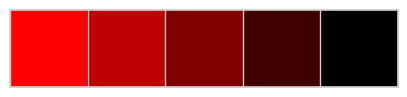

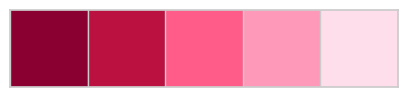

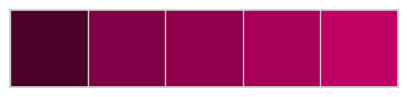

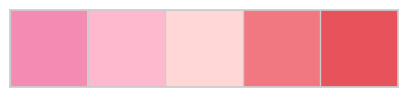

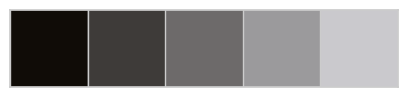

In [2]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

# Membaca Dataset

In [3]:
#Import dataset Indeks Pembangunan Manusia
df = pd.read_csv('https://github.com/akhirilanwarharahap/AI-Mastery-Orbit-Future-Academy/blob/main/Dataset/IPM.csv')

#Show Dataset
df.head(10)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
5,13.04,8577,8.21,68.74,Normal
6,14.28,10780,9.86,68.86,High
7,14.61,9593,9.55,67.99,High
8,14.73,9644,10.33,69.79,High
9,14.47,9860,9.00,66.95,High


In [4]:
#Number of row and column
df.shape



(2196, 5)

In [5]:
#Dataset Detail
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


Pada Dataset IPM tidak terdapat Missing Value sehingga tidak perlu dilakukan cleaning data dari missing value

In [6]:
#Target Class Detail
df['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

In [7]:
df.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [8]:
df[df['IPM']=='High'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,829.000000,829.000000,829.000000,829.000000
mean,13.394692,11623.250905,9.086417,71.308384
std,0.837822,1432.000579,1.069146,2.200747
min,11.490000,8188.000000,6.980000,64.570000
25%,12.810000,10638.000000,8.280000,69.920000
50%,13.230000,11486.000000,8.950000,71.170000
75%,13.890000,12367.000000,9.900000,72.550000
max,16.410000,18121.000000,11.710000,77.730000


In [9]:
df[df['IPM']=='Low'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,93.000000,93.000000,93.000000,93.000000
mean,9.549892,5389.580645,4.403441,63.531075
std,2.549142,861.622866,1.635205,3.427240
min,2.950000,3975.000000,0.850000,54.820000
25%,7.660000,4826.000000,3.040000,60.230000
50%,9.810000,5282.000000,4.570000,65.170000
75%,11.720000,5633.000000,5.650000,65.740000
max,13.470000,8198.000000,7.440000,67.620000


In [10]:
luar= df[df['Pengeluaran_Perkapita']<11479].shape
shape = df.shape

list(luar)
list(shape)
hasil_bagi = []
hasil_bagi.append(luar[0] / shape[0])
percent = hasil_bagi[0] * 100
print("Pengeluaran Perkapita dibawah 11479 adalah {:.1f}%".format(percent))



Pengeluaran Perkapita dibawah 11479 adalah 71.8%


In [11]:
rata= df[df['Rerata_Lama_Sekolah']>12].shape
shape = df.shape

list(rata)
list(shape)
hasil_bagi = []
hasil_bagi.append(rata[0] / shape[0])
percent = hasil_bagi[0] * 100
print("Rata-rata bersekolah diatas 12 tahun adalah {:.1f}%".format(percent))



Rata-rata bersekolah diatas 12 tahun adalah 0.3%


In [12]:
# Harapan lama sekolah di bawah 12 tahun
df[df['Harapan_Lama_Sekolah']>=12].shape

(1908, 5)

In [13]:
#Harapan Lama Hidup

harapan= df[df['Harapan_Lama_Sekolah']<12].shape
shape = df.shape

list(harapan)
list(shape)
hasil_bagi = []
hasil_bagi.append(harapan[0] / shape[0])
percent = hasil_bagi[0] * 100
print("Harapan Lama Sekolah Di Bawah 12 Tahun adalah  {:.1f}%".format(percent))

Harapan Lama Sekolah Di Bawah 12 Tahun adalah  13.1%


In [14]:
# Angka Harapan Hidup dibawah publikasi BPS
harapan_hidup = df[df['Usia_Harapan_Hidup']<71.88].shape
list(harapan)
list(shape)
hasil_bagi = []
hasil_bagi.append(harapan_hidup[0] / shape[0])
percent = hasil_bagi[0] * 100
print("Harapan Hidup Dibawah rata-rata adalah  {:.1f}%".format(percent))



Harapan Hidup Dibawah rata-rata adalah  76.0%


Data terakhir dari Badan Pusat Statistik (BPS 2022) menunjukkan bahwa rata-rata Angka Harapan Hidup (AHH) masyarakat Indonesia  adalah sekitar 71.88

# EDA (Exploration Data Analys) 


EDA dilakukan untukmenemukan pola mendeteksi anomali pengujian hipotesis dan untuk memvalidasi asumsi menggunakan statistik ringkasan dan representasi visual lainnya. EDA juga digunakan untuk menentukan algoritma yang paling cocok untuk dataset



# Category Variabel

1. IPM

******************************
.: Chest Pain Type Total :.
******************************


Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

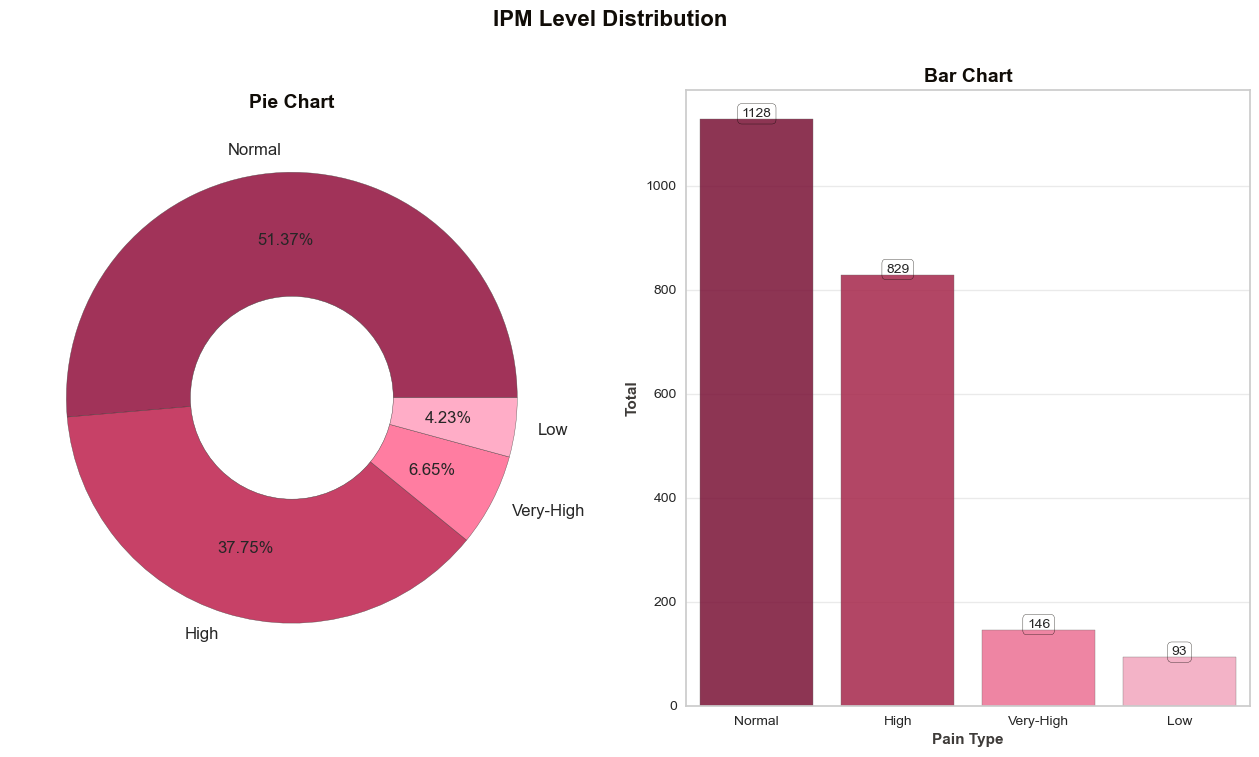

In [15]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Normal','High','Very-High','Low']
order=df['IPM'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('IPM Level Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['IPM'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='IPM', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.IPM.value_counts(dropna=False)

Dapat dilihat bersama, bahwasanya persebaran jumlah antara masing-masing kelas memiliki jarak yang cukup jauh, sehingga terjadi imbalance data. Ternyata di Indonesia di dominasi oleh masyarakat dengan IPM Normal 51.37% dan High yaitu 37.75%, yaitu 

# Numerical Variable

# Descriptive Statistic

In [16]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Harapan_Lama_Sekolah,2196.000000,12.931498,1.312967,2.950000,12.350000,12.860000,13.570000,17.800000
Pengeluaran_Perkapita,2196.000000,10323.144353,2664.738311,3975.000000,8599.750000,10192.500000,11670.500000,23888.000000
Rerata_Lama_Sekolah,2196.000000,8.291585,1.611256,0.850000,7.390000,8.180000,9.180000,12.830000
Usia_Harapan_Hidup,2196.000000,69.467418,3.437536,54.820000,67.210000,69.785000,71.712500,77.730000


Dari descriptive statistics diatas, terlihat bahwa STD (standard deviation) dari Pengeluaran_Perkapita sangat tinggi dibandingkan yang lainnya.
Sehingga perlu dilakukan scaling

# Continuous Column Distribution

# 1. Harapan_Lama_Sekolah

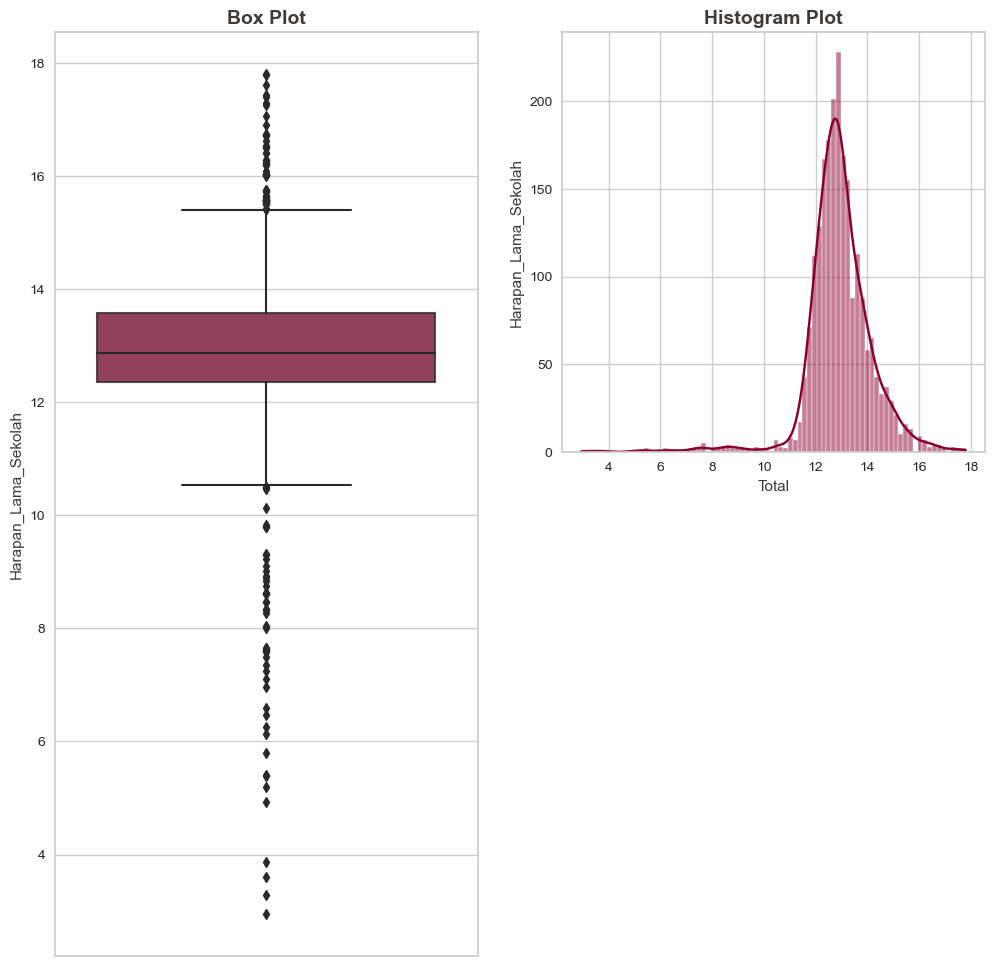

In [17]:
var = 'Harapan_Lama_Sekolah'
color = pink_grad[0]
fig=plt.figure(figsize=(12, 12))

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Harapan_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Harapan_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

Dapat dilihat bersama bahwa data Harapan_Lama_Sekolah memiliki banyak outlier, sehingga harus dilakukan scaling

# Pengeluaran_Perkapita

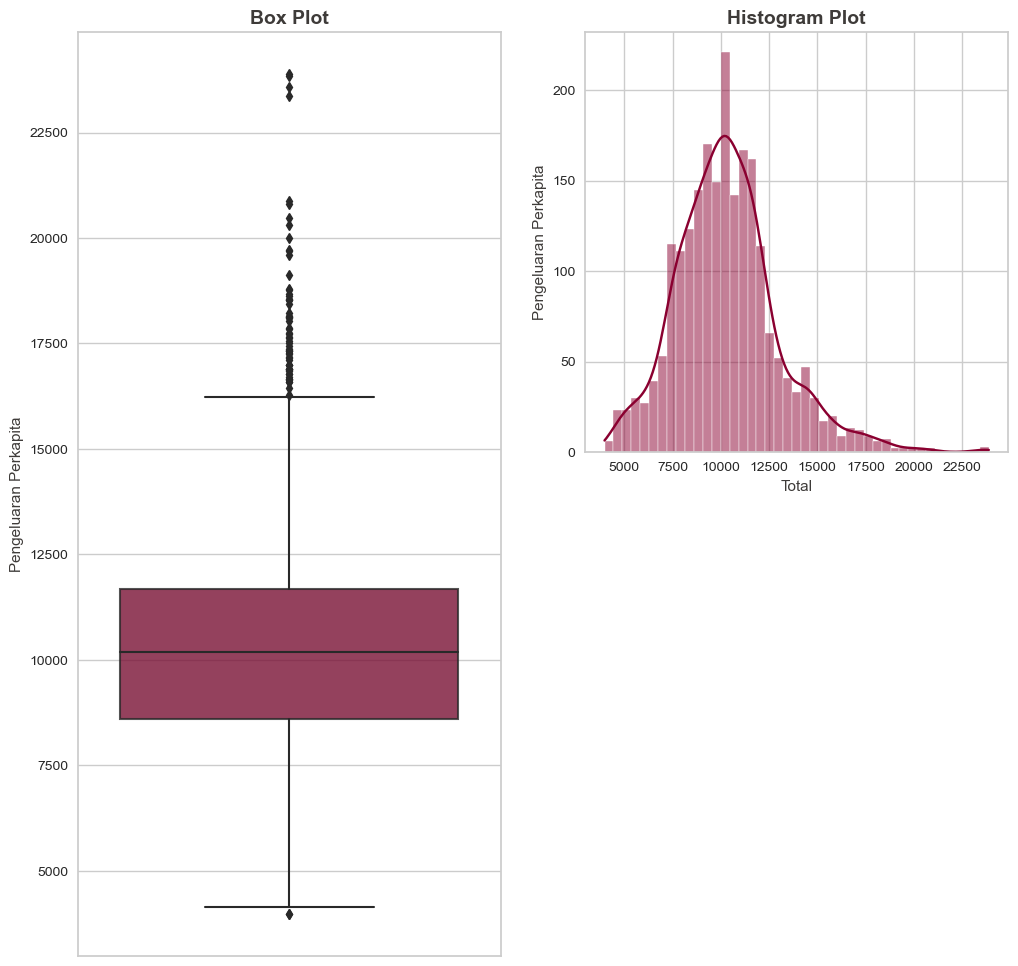

In [18]:
var = 'Pengeluaran_Perkapita'
color = pink_grad[0]
fig=plt.figure(figsize=(12, 12))

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Pengeluaran Perkapita', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Pengeluaran Perkapita', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

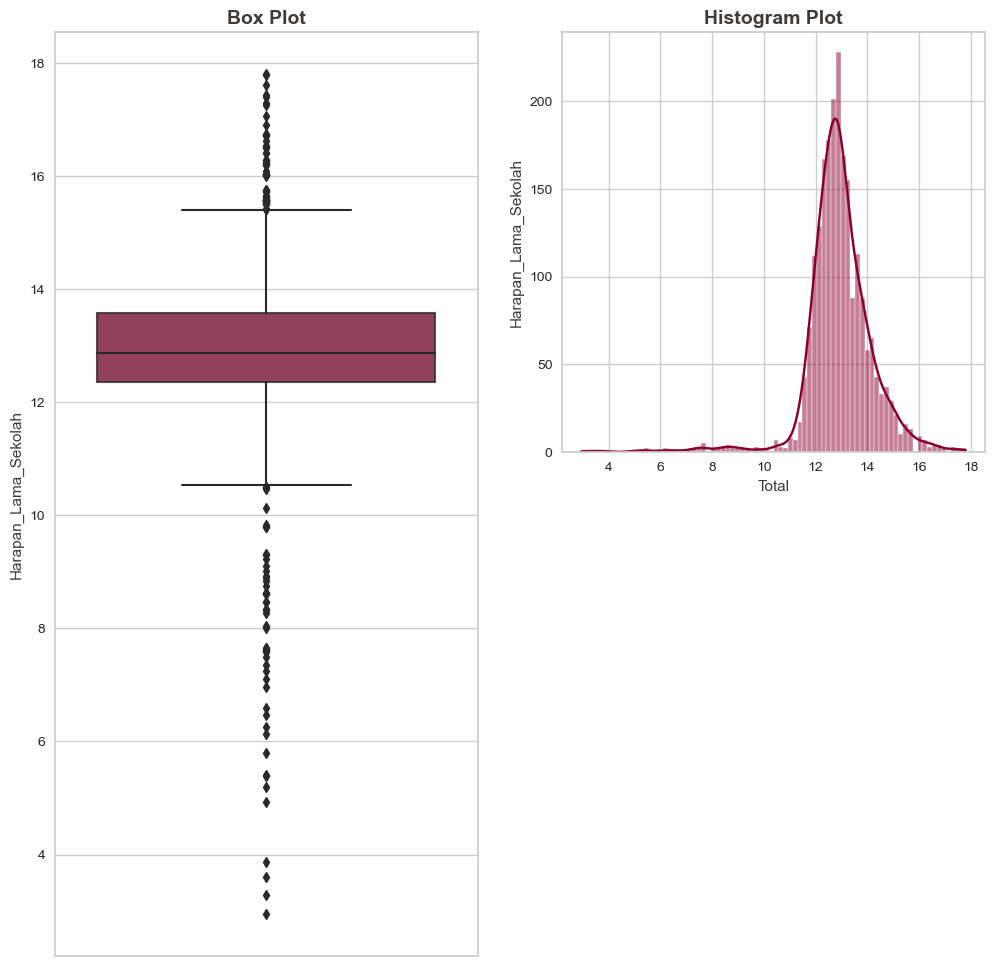

In [19]:
var = 'Harapan_Lama_Sekolah'
color = pink_grad[0]
fig=plt.figure(figsize=(12, 12))

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Harapan_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Harapan_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

# Rerata_Lama_Sekolah

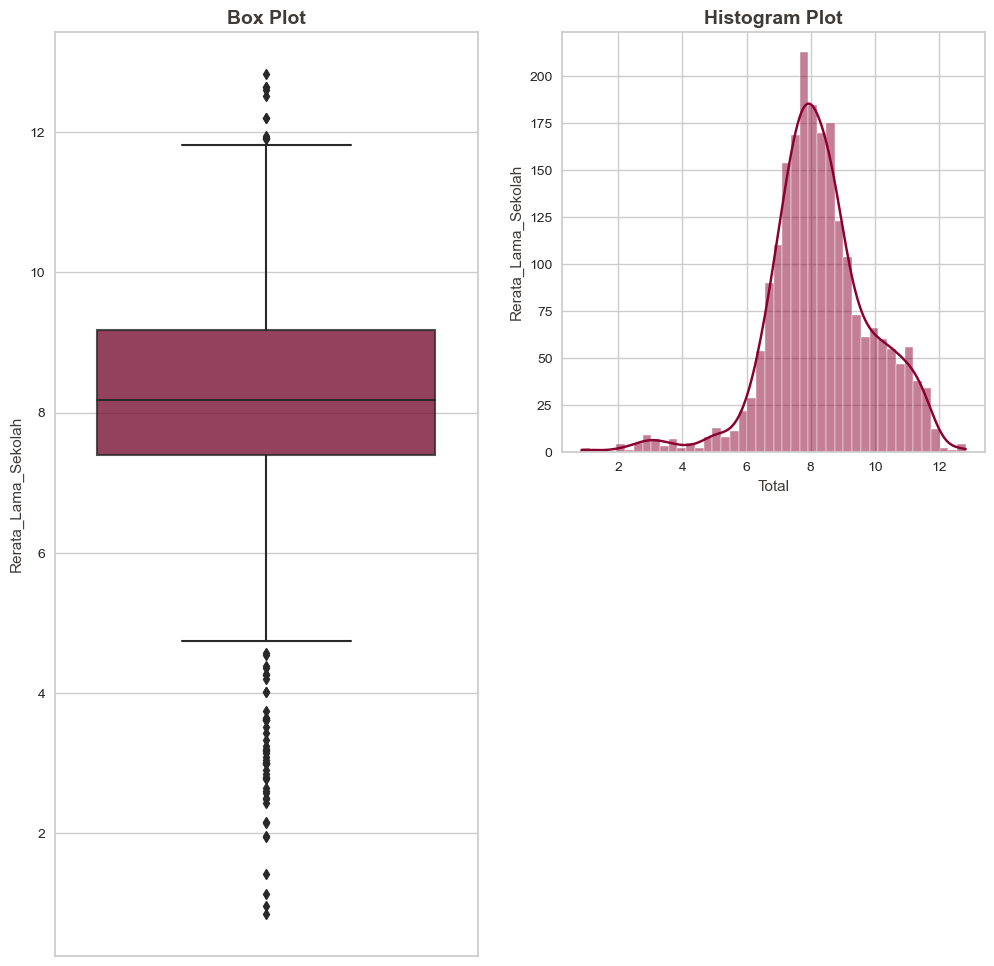

In [20]:
var = 'Rerata_Lama_Sekolah'
color = pink_grad[0]
fig=plt.figure(figsize=(12, 12))

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Rerata_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Rerata_Lama_Sekolah', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

# Usia Harapan Hidup

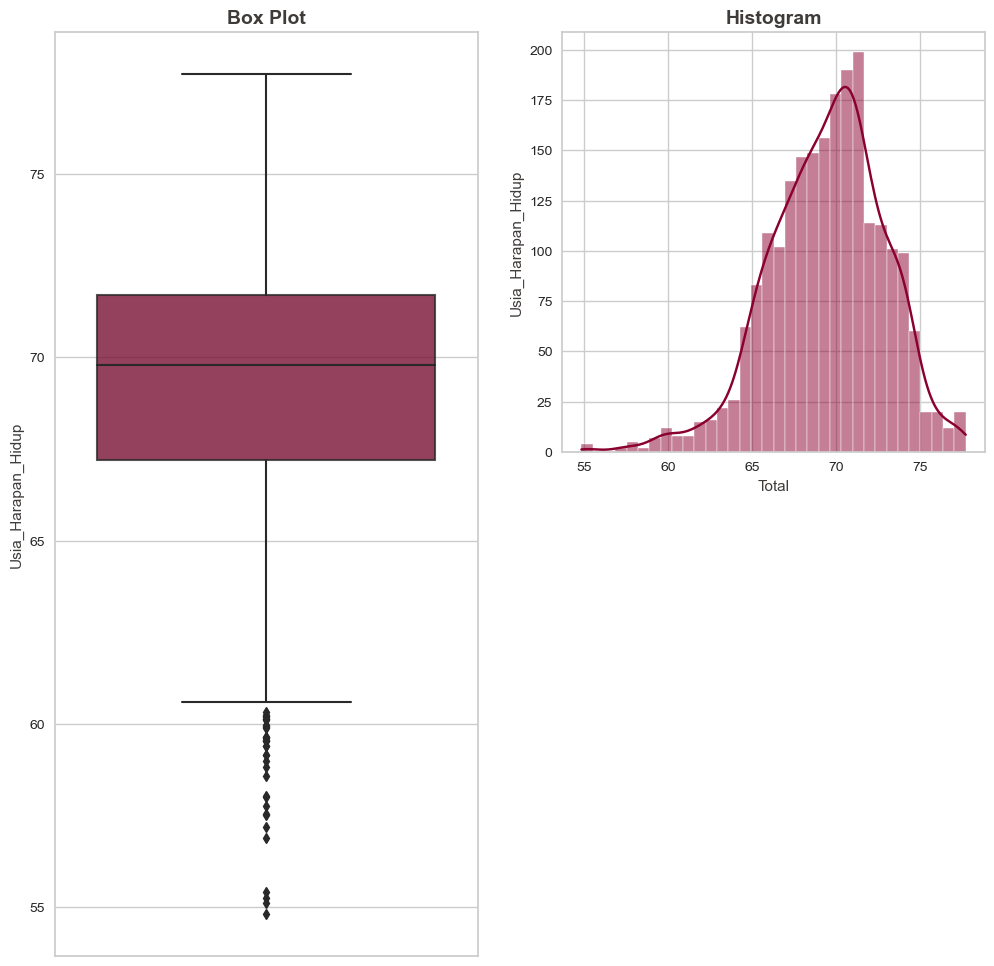

In [21]:
var = 'Usia_Harapan_Hidup'
color = pink_grad[0]
fig=plt.figure(figsize=(12, 12))

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Usia_Harapan_Hidup', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Usia_Harapan_Hidup', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

# HeatMap

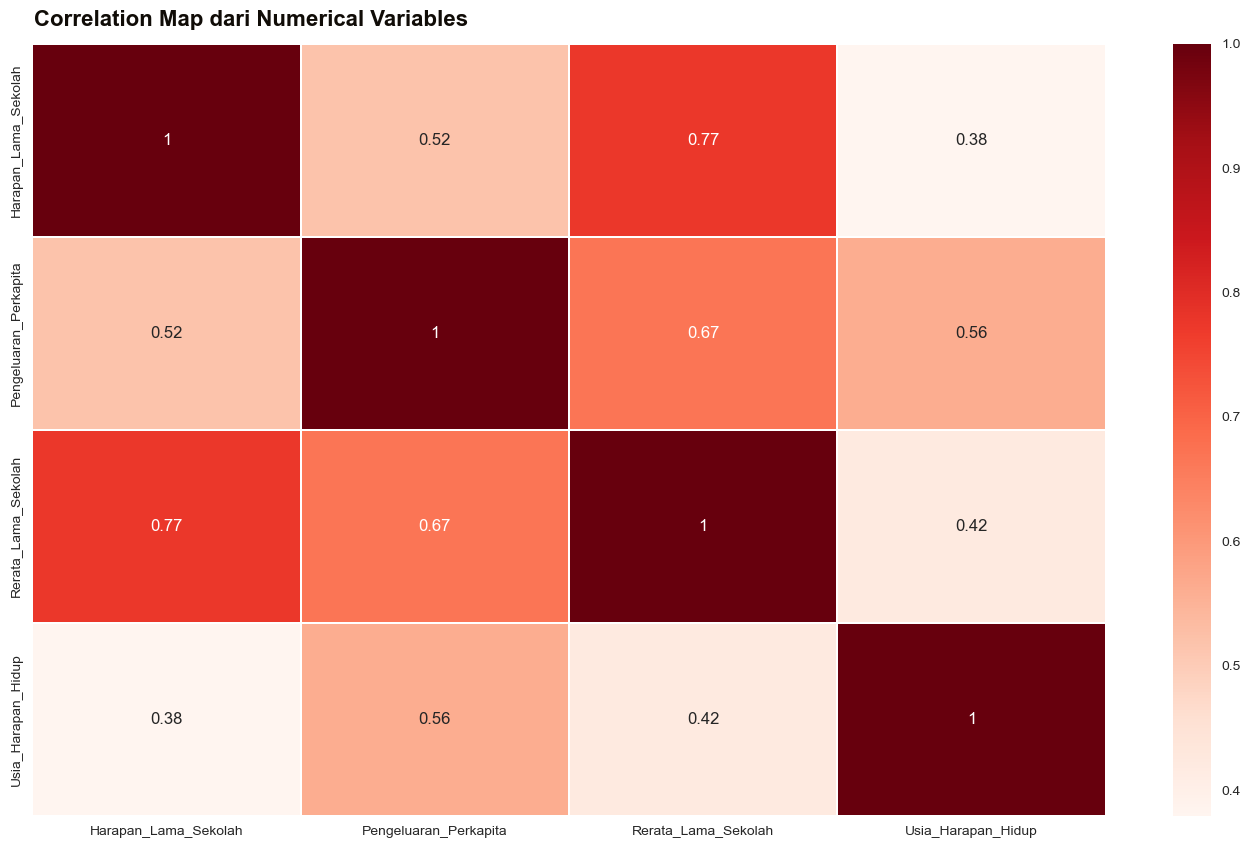

In [22]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map dari Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

Dapat dilihat bersama, korelasi dari masing-masing variable. Korelasi paling tinggi adalah Rerata_Lama_Sekolah dan Harapan_Lama_Sekolah

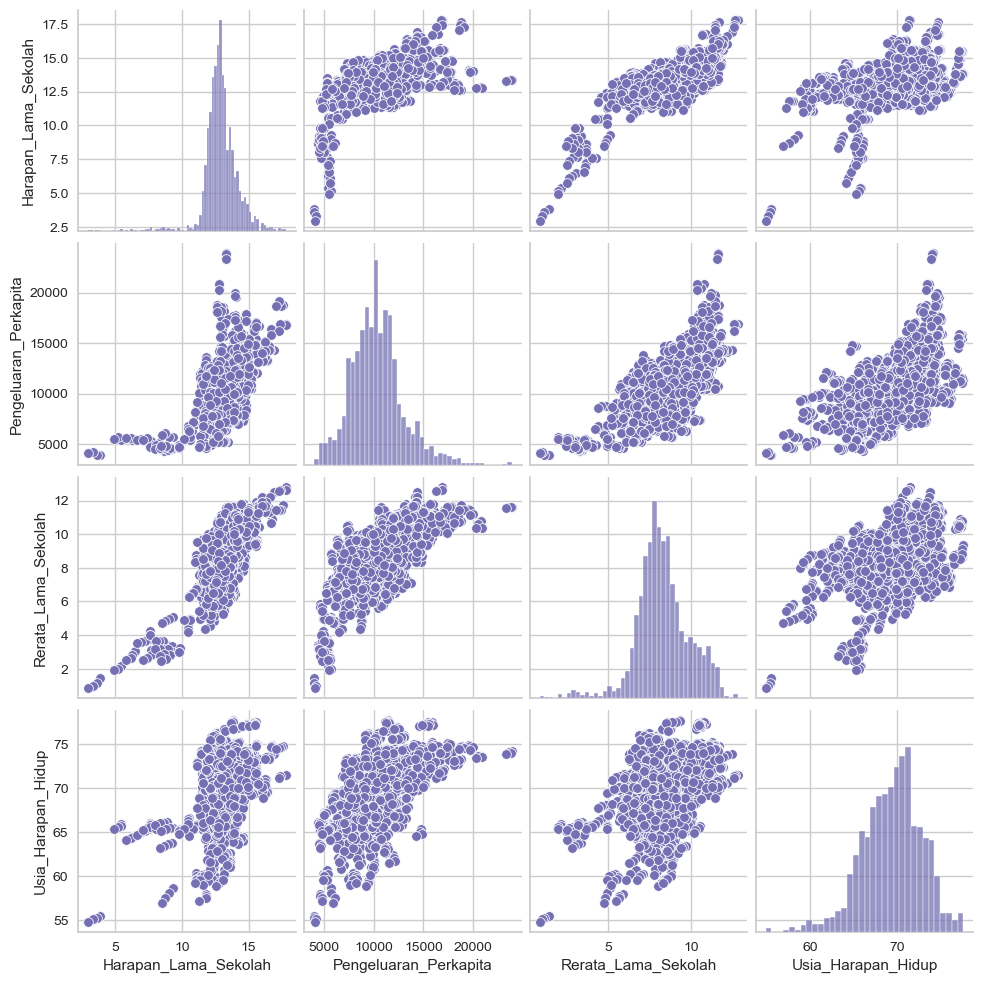

In [23]:
sns.pairplot(df)

<AxesSubplot:xlabel='IPM', ylabel='Rerata_Lama_Sekolah'>

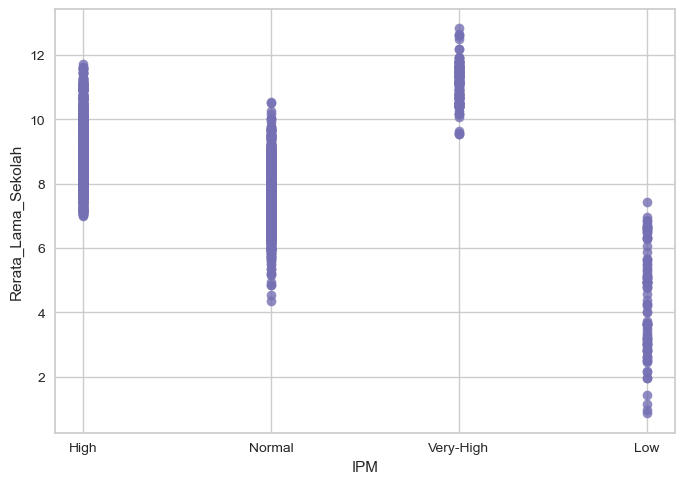

In [24]:
sns.regplot(x=df["IPM"], y=df["Rerata_Lama_Sekolah"], fit_reg=False) # Don't fit a regression line

# Pre-Processing

Preprocessing yang dilakukan diantaranya adalah:

1. Encoding
Mentransformasikan data IPM yang merupakan ordinal categoy menggunakan OrdinalEncoder, karena IPM mementingkan urutan    
2. Features Separating
Memisahkan antara dependent column dengan dengan independent column
3. Scaling data
Dataset IPM memiliki banyak outlier sehingga harus discalling. Salah satu Scaller yang paling baik untuk menangani data outlier adalah menggunakan RobustScaler()
4. Splitting Dataset
Dataset akan dibagi ke dalam perbandingan(80% training dan 20% testing).

    
    

In [25]:
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [26]:
df['IPM'].unique()

array(['High', 'Normal', 'Very-High', 'Low'], dtype=object)

In [27]:
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


# Encoding

In [28]:
ipm = ['Low','Normal','High','Very-High']

In [29]:
enc = OrdinalEncoder(categories=[ipm])

In [30]:
enc.fit_transform(df[['IPM']])

array([[2.],
       [1.],
       [1.],
       ...,
       [0.],
       [2.],
       [2.]])

In [31]:
df[["IPM"]] = enc.fit_transform(df[['IPM']])

In [32]:
df.head(10)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2.0
1,13.90,7148,9.48,65.28,1.0
2,14.32,8776,8.68,67.43,1.0
3,14.60,8180,8.88,64.40,1.0
4,14.01,8030,9.67,68.22,1.0
5,13.04,8577,8.21,68.74,1.0
6,14.28,10780,9.86,68.86,2.0
7,14.61,9593,9.55,67.99,2.0
8,14.73,9644,10.33,69.79,2.0
9,14.47,9860,9.00,66.95,2.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 85.9 KB


# Feature Separating

In [34]:
#Feature Separating
X = df.drop(['IPM'], axis=1)
y = df['IPM']

In [35]:
X.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22


In [36]:
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: IPM, dtype: float64

# Scalling

In [37]:
#Scaling
X = RobustScaler().fit_transform(X)

X = pd.DataFrame(X, columns=df.iloc[:,:-1].columns)

X.head()




,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,1.229508,-0.202068,0.664804,0.038867
1,0.852459,-0.991452,0.726257,-1.000555
2,1.196721,-0.461288,0.279330,-0.523043
3,1.426230,-0.655377,0.391061,-1.196002
4,0.942623,-0.704225,0.832402,-0.347585


# Splitting Dataset

In [38]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(1756, 4)

In [40]:
X_test.shape

(440, 4)

# Modeling

Ada 5 Model atau algoritma yang akan digunakan, yaitu

1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbour (KNN)
4. Random Forest
5. AdaBoost
Parameter pada semua model yang digunakan adalah default. Karena dataset IPM ini memiliki banyak adat outlier, maka akan dilakukan imbalancing dada pada masing-masing model. imbalancing data dilakukan dengan SMOTE. Setelah itu akan diuji performanya antara masing-masing algoritma untuk memperoleh model terbaik

# Logistic Regretion

In [41]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

.:. Logistic Regression Accuracy: 97.73% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.98      1.00      0.99       227
         2.0       0.99      0.95      0.97       164
         3.0       0.89      0.97      0.93        33

    accuracy                           0.98       440
   macro avg       0.97      0.96      0.96       440
weighted avg       0.98      0.98      0.98       440


.: Performance Evaluation
**************************


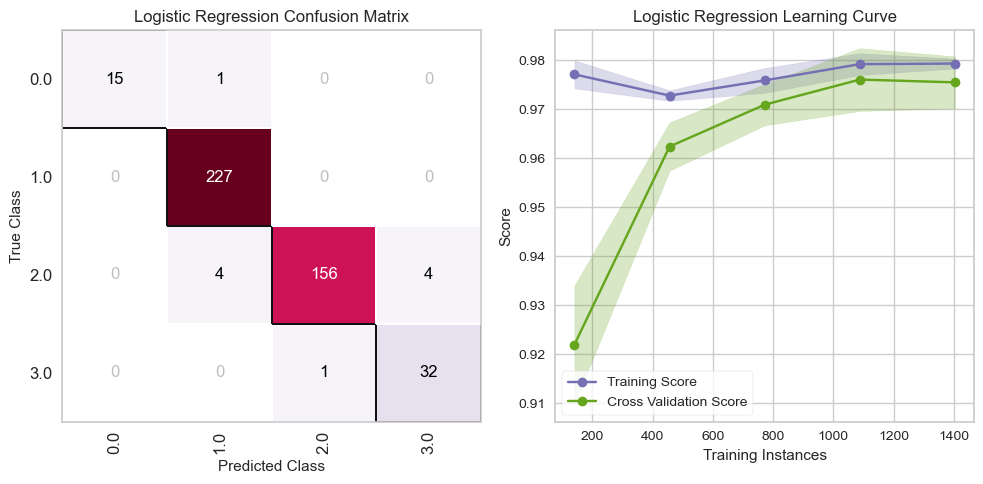

In [42]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

plt.tight_layout();

In [43]:
LR = LRclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', LR)
print('Skor akurasi data uji:', LRclassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', LRAcc)

Skor akurasi data latih: 0.9789293849658315
Skor akurasi data uji: 0.9772727272727273
Skor akurasi prediksi: 0.9772727272727273


# Logistic Regretion With Balancing SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [45]:
LRclassifierSMOTE = LogisticRegression()
LRclassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_LR_SMOTE = LRclassifierSMOTE.predict(X_test)

.:. Logistic Regression Accuracy: 95.91% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        16
         1.0       0.99      0.97      0.98       227
         2.0       0.97      0.93      0.95       164
         3.0       0.80      1.00      0.89        33

    accuracy                           0.96       440
   macro avg       0.90      0.98      0.93       440
weighted avg       0.96      0.96      0.96       440


.: Performance Evaluation
**************************


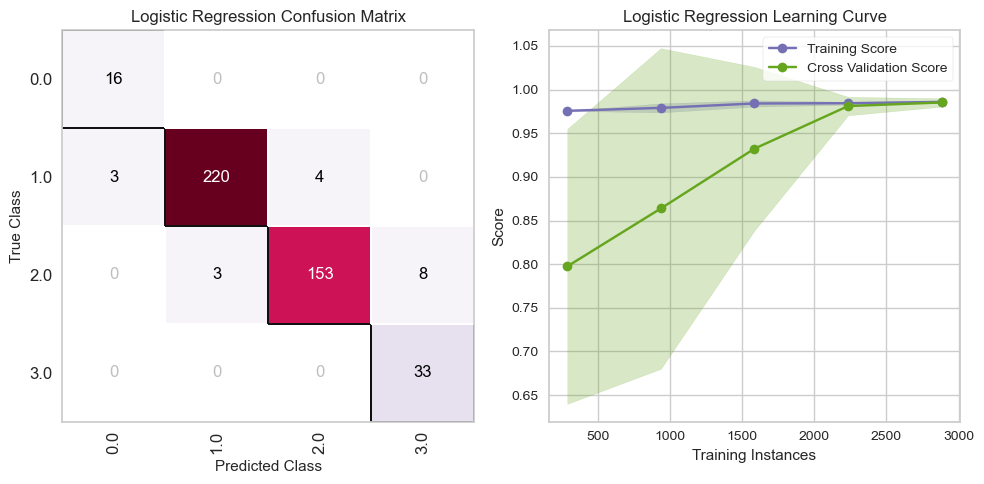

In [46]:
# --- LR Accuracy ---
LRSMOTEAcc = accuracy_score(y_pred_LR_SMOTE, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRSMOTEAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train_SMOTE, y_train_SMOTE)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifierSMOTE, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(X_train_SMOTE, y_train_SMOTE)
loglc.finalize()

plt.tight_layout();

In [47]:
LRSMOTE = LRclassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:', LRSMOTE)
print('Skor akurasi data uji:', LRclassifierSMOTE.score(X_test, y_test))
print('Skor akurasi prediksi:', LRSMOTEAcc)

Skor akurasi data latih: 0.9869589345172031
Skor akurasi data uji: 0.9590909090909091
Skor akurasi prediksi: 0.9590909090909091


# Decision Tree

In [48]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier()

DTCclassifier.fit(X_train, y_train)
y_pred_DTC = DTCclassifier.predict(X_test)

.:. Decision Tree Accuracy: 95.45% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.97      0.96      0.97       227
         2.0       0.93      0.95      0.94       164
         3.0       0.91      0.94      0.93        33

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.96      0.95      0.95       440


.: Performance Evaluation
**************************


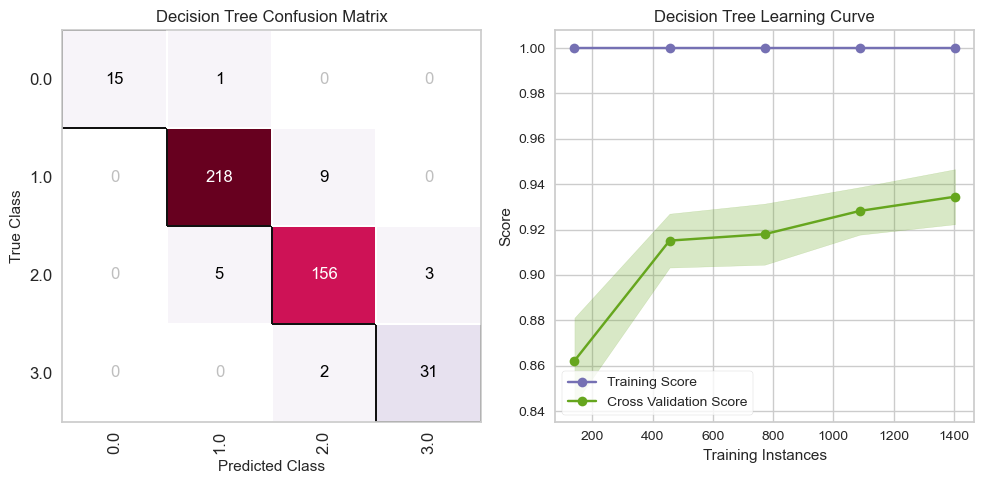

In [49]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(X_train, y_train)
dtcmatrix.score(X_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax2, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.finalize()

plt.tight_layout();

In [50]:
DT = DTCclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', DT)
print('Skor akurasi data uji:', DTCclassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', DTCAcc)

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9545454545454546
Skor akurasi prediksi: 0.9545454545454546


# DECISION TREE WITH BALANCING SMOTE

In [51]:
DTCclassifierSMOTE = DecisionTreeClassifier()
DTCclassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_DTC_SMOTE = DTCclassifierSMOTE.predict(X_test)

.:. Decision Tree Accuracy: 95.00% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        16
         1.0       0.97      0.95      0.96       227
         2.0       0.93      0.95      0.94       164
         3.0       0.91      0.97      0.94        33

    accuracy                           0.95       440
   macro avg       0.93      0.95      0.94       440
weighted avg       0.95      0.95      0.95       440


.: Performance Evaluation
**************************


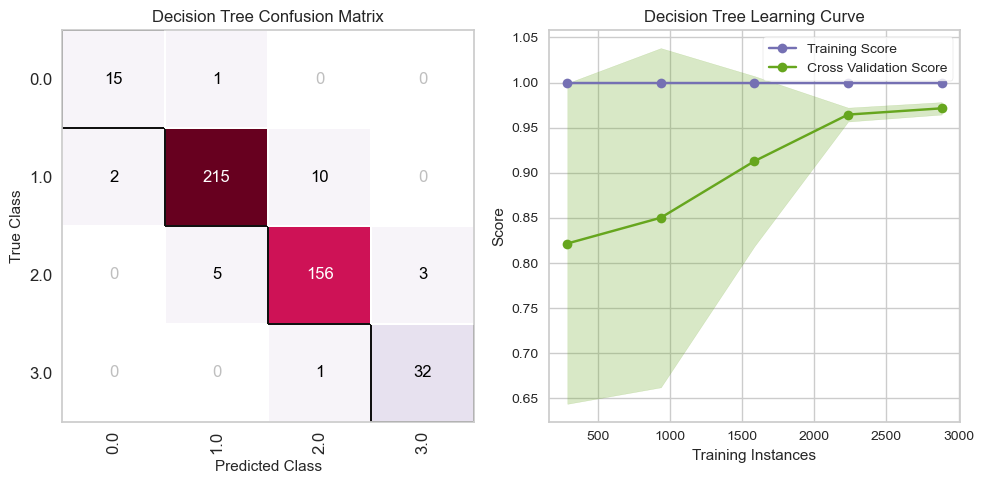

In [52]:
# --- Decision Tree Accuracy ---
DTSMOTEAcc = accuracy_score(y_pred_DTC_SMOTE, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTSMOTEAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(X_train_SMOTE, y_train_SMOTE)
dtcmatrix.score(X_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifierSMOTE, ax=ax2, title='Decision Tree Learning Curve')
dtclc.fit(X_train_SMOTE, y_train_SMOTE)
dtclc.finalize()

plt.tight_layout();

In [53]:
DTSMOTE = DTCclassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:', DTSMOTE)
print('Skor akurasi data uji:', DTCclassifierSMOTE.score(X_test, y_test))
print('Skor akurasi prediksi:', DTSMOTEAcc)

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.95
Skor akurasi prediksi: 0.95


# KNN

In [54]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)

.:. K-Nearest Neighbour Accuracy: 95.91% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.97      0.97      0.97       227
         2.0       0.96      0.93      0.95       164
         3.0       0.87      1.00      0.93        33

    accuracy                           0.96       440
   macro avg       0.95      0.96      0.95       440
weighted avg       0.96      0.96      0.96       440


.: Performance Evaluation
**************************


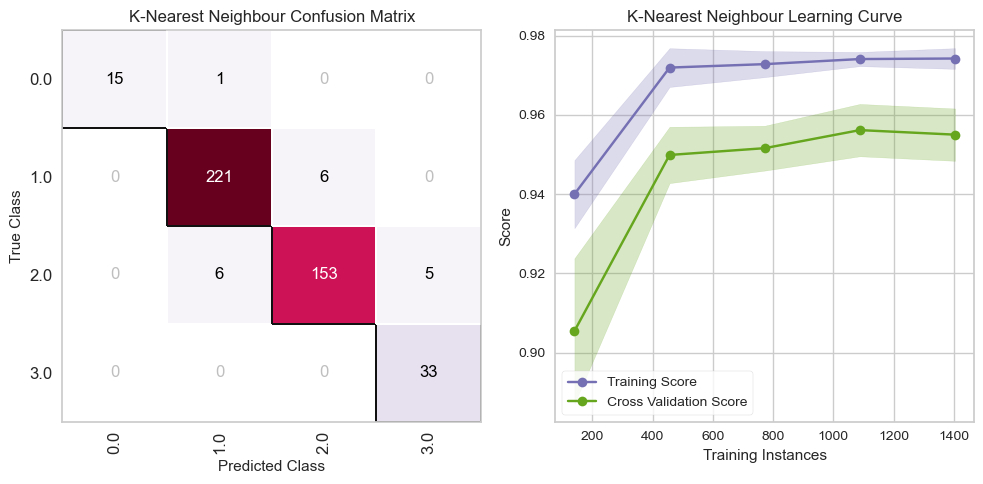

In [55]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()

plt.tight_layout();

In [56]:
KNN = KNNClassifier.score(X_train, y_train)
print('Skor akurasi data latih:', KNN)
print('Skor akurasi data uji:', KNNClassifier.score(X_test, y_test))
print('Skor akurasi prediksi:', KNNAcc)

Skor akurasi data latih: 0.9772209567198178
Skor akurasi data uji: 0.9590909090909091
Skor akurasi prediksi: 0.9590909090909091


# KNN With Balancing SMOTE

In [57]:
KNNClassifierSMOTE = KNeighborsClassifier()
KNNClassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_KNN_SMOTE = KNNClassifierSMOTE.predict(X_test)



.:. K-Nearest Neighbour Accuracy: 95.68% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.98      0.95      0.97       227
         2.0       0.95      0.95      0.95       164
         3.0       0.89      1.00      0.94        33

    accuracy                           0.96       440
   macro avg       0.93      0.98      0.95       440
weighted avg       0.96      0.96      0.96       440


.: Performance Evaluation
**************************


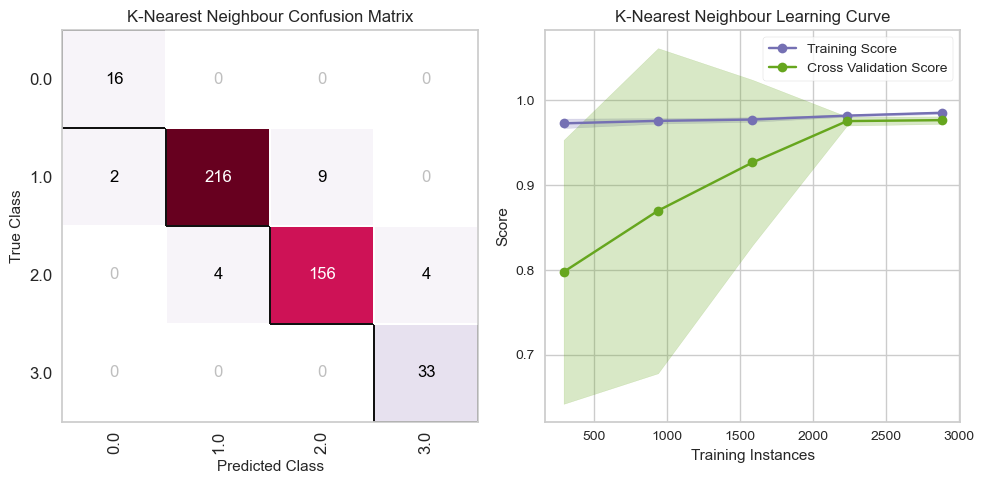

In [58]:
# --- KNN Accuracy ---
KNNSMOTEAcc = accuracy_score(y_pred_KNN_SMOTE, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNSMOTEAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train_SMOTE, y_train_SMOTE)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifierSMOTE, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train_SMOTE, y_train_SMOTE)
knnlc.finalize()

plt.tight_layout();

In [59]:
KNNSMOTE = KNNClassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:', KNNSMOTE)
print('Skor akurasi uji:', KNNSMOTEAcc)

Skor akurasi data latih: 0.9877913429522752
Skor akurasi uji: 0.9568181818181818


# Random Forest

In [60]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier()

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

.:. Random Forest Accuracy: 96.36% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.97      0.97      0.97       227
         2.0       0.96      0.95      0.95       164
         3.0       0.91      0.97      0.94        33

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440


.: Performance Evaluation
**************************


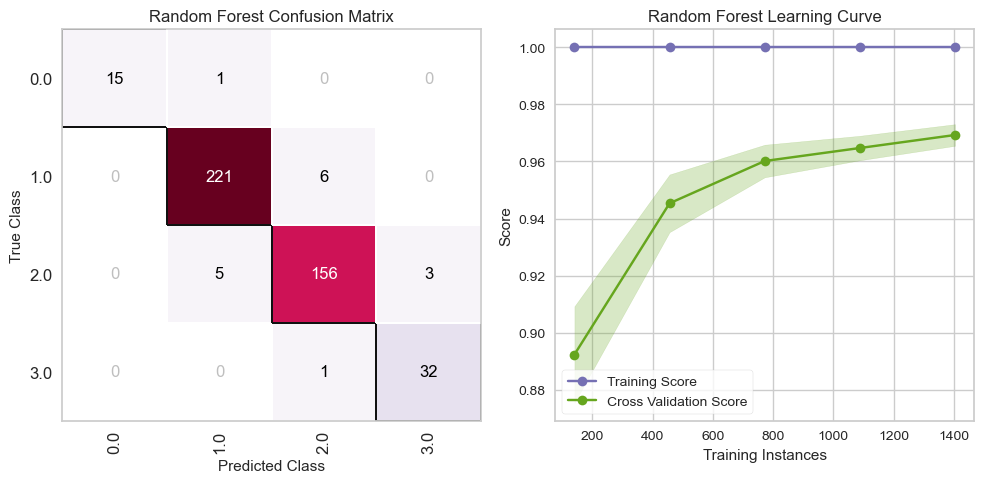

In [61]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

plt.tight_layout();

In [62]:
RF = RFclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', RF)
print('Skor akurasi uji:', RFAcc)

Skor akurasi data latih: 1.0
Skor akurasi uji: 0.9636363636363636


# Random Forest With SMOTE Balancing

In [63]:
RFclassifierSMOTE = RandomForestClassifier()

RFclassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_RF_SMOTE = RFclassifierSMOTE.predict(X_test)

.:. Random Forest Accuracy: 97.50% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       0.99      0.98      0.98       227
         2.0       0.97      0.97      0.97       164
         3.0       0.94      0.97      0.96        33

    accuracy                           0.97       440
   macro avg       0.96      0.98      0.97       440
weighted avg       0.98      0.97      0.98       440


.: Performance Evaluation
**************************


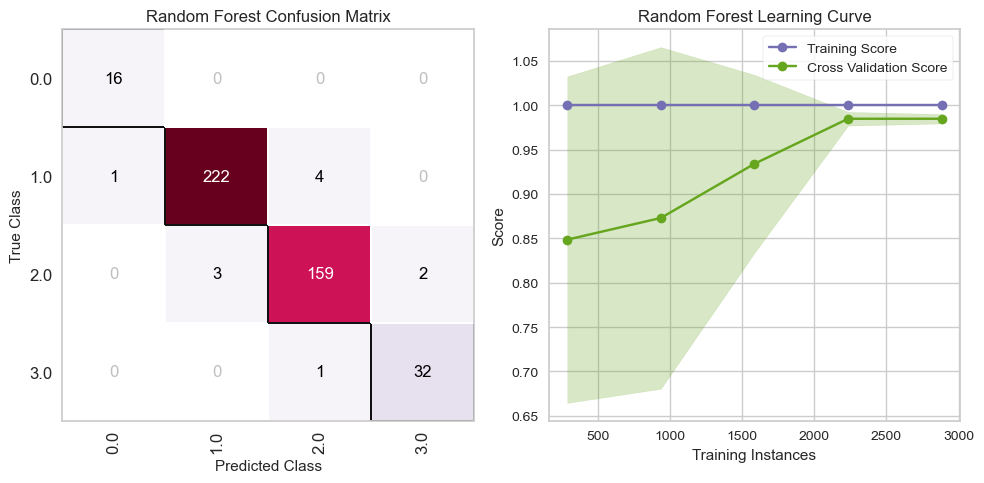

In [64]:
# --- Random Forest Accuracy ---
RFSMOTEAcc = accuracy_score(y_pred_RF_SMOTE, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFSMOTEAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train_SMOTE, y_train_SMOTE)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifierSMOTE, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(X_train_SMOTE, y_train_SMOTE)
rcclc.finalize()

plt.tight_layout();

In [65]:
RFSMOTE = RFclassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:',RFSMOTE)
print('Skor akurasi prediksi:', RFSMOTEAcc)

Skor akurasi data latih: 1.0
Skor akurasi prediksi: 0.975


# Adabost

In [66]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

.:. AdaBoost Accuracy: 72.73% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        16
         1.0       0.83      0.78      0.80       227
         2.0       0.65      0.77      0.71       164
         3.0       0.00      0.00      0.00        33

    accuracy                           0.73       440
   macro avg       0.50      0.64      0.55       440
weighted avg       0.69      0.73      0.70       440


.: Performance Evaluation
**************************


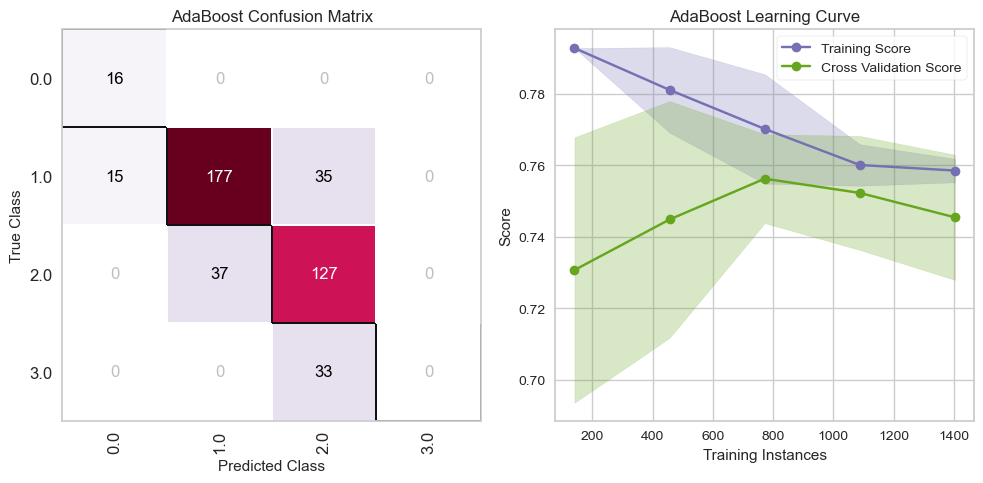

In [67]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train, y_train)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(X_train, y_train)
ablc.finalize()


plt.tight_layout();

In [68]:
AB = ABclassifier.score(X_train, y_train)
print('Skor akurasi data latih:', AB)
print('Skor akurasi prediksi:', ABAcc)

Skor akurasi data latih: 0.7539863325740319
Skor akurasi prediksi: 0.7272727272727273


# Adaboost With SMOTE Balancing

In [69]:
ABclassifierSMOTE = AdaBoostClassifier()

ABclassifierSMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB_SMOTE = ABclassifierSMOTE.predict(X_test)

.:. AdaBoost Accuracy: 12.50% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

         0.0       0.64      0.44      0.52        16
         1.0       0.62      0.07      0.12       227
         2.0       0.00      0.00      0.00       164
         3.0       0.08      1.00      0.15        33

    accuracy                           0.12       440
   macro avg       0.34      0.38      0.20       440
weighted avg       0.35      0.12      0.09       440


.: Performance Evaluation
**************************


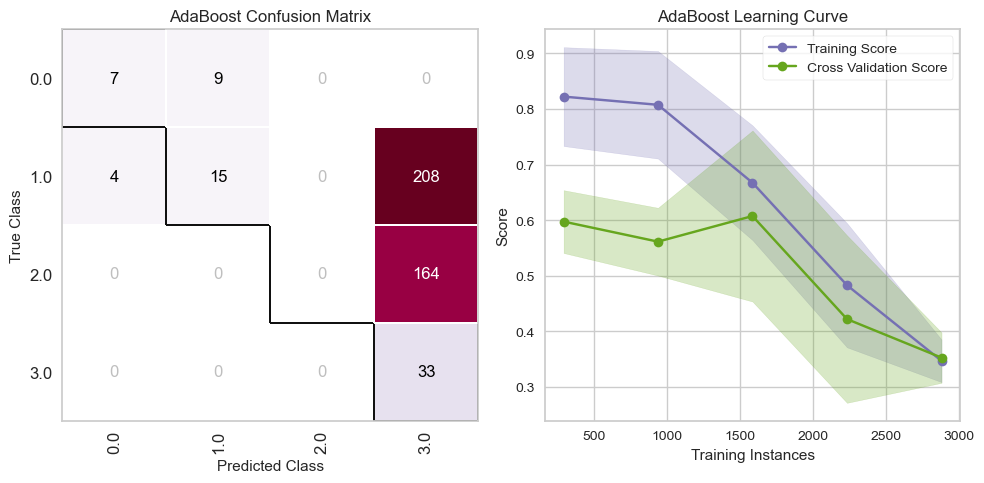

In [70]:
# --- AdaBoost Accuracy ---
ABSMOTEAcc = accuracy_score(y_pred_AB_SMOTE, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABSMOTEAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB_SMOTE))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifierSMOTE, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(X_train_SMOTE, y_train_SMOTE)
abcmatrix.score(X_test, y_test)
abcmatrix.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifierSMOTE, ax=ax2, title='AdaBoost Learning Curve')
ablc.fit(X_train_SMOTE, y_train_SMOTE)
ablc.finalize()


plt.tight_layout();

In [71]:
ABSMOTE = ABclassifierSMOTE.score(X_train_SMOTE, y_train_SMOTE)
print('Skor akurasi data latih:', ABSMOTE)
print('Skor akurasi prediksi:', ABSMOTEAcc)

Skor akurasi data latih: 0.3157602663706992
Skor akurasi prediksi: 0.125


# Perbandingan Akurasi Data Latih dan Data Uji Tanpa Imbalancing Data

In [72]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model Data Latih': ['Logistic Regression', 'K-Nearest Neighbour', 
                                  'Decision Tree', 'Random Forest', 'AdaBoost'], 
                        'Akurasi Data Latih': [LR*100, KNN*100, DT*100, RF*100, AB*100],
                        'Model Data Uji': ['Logistic Regression', 'K-Nearest Neighbour', 
                                  'Decision Tree', 'Random Forest', 'AdaBoost'], 
                        'Akurasi Data Uji': [LRAcc*100, KNNAcc*100, DTCAcc*100, RFAcc*100, ABAcc*100]
                       })


# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Akurasi Data Latih', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model Data Latih,Akurasi Data Latih,Model Data Uji,Akurasi Data Uji
Decision Tree,100.000000,Decision Tree,95.454545
Random Forest,100.000000,Random Forest,96.363636
Logistic Regression,97.892938,Logistic Regression,97.727273
K-Nearest Neighbour,97.722096,K-Nearest Neighbour,95.909091
AdaBoost,75.398633,AdaBoost,72.727273


# Perbandingan Akurasi Data Latih dan Data Uji Dengan Imbalancing Data

In [73]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model Data Latih': ['Logistic Regression', 'K-Nearest Neighbour', 
                                  'Decision Tree', 'Random Forest', 'AdaBoost'], 
                        'Akurasi Data Latih': [LRSMOTE*100, KNNSMOTE*100, DTSMOTE*100, RFSMOTE*100, ABSMOTE*100],
                        'Model Data Uji': ['Logistic Regression', 'K-Nearest Neighbour', 
                                  'Decision Tree', 'Random Forest', 'AdaBoost'], 
                        'Akurasi Data Uji': [LRSMOTEAcc*100, KNNSMOTEAcc*100, DTSMOTEAcc*100, RFSMOTEAcc*100, ABSMOTEAcc*100]
                       
                       })

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Akurasi Data Latih', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model Data Latih,Akurasi Data Latih,Model Data Uji,Akurasi Data Uji
Decision Tree,100.000000,Decision Tree,95.000000
Random Forest,100.000000,Random Forest,97.500000
K-Nearest Neighbour,98.779134,K-Nearest Neighbour,95.681818
Logistic Regression,98.695893,Logistic Regression,95.909091
AdaBoost,31.576027,AdaBoost,12.500000


# Prediction Case

In [74]:
# --- Turn Information into List ---
data = [[14.36, 9572, 9.37, 69.96]]   # #Harapan_Lama_Sekolah, Pengeluaran_Perkapita, Rerata_Lama_Sekolah, Usia_Harapan_Hidup
# --- Prediction using Gradient Boosting ---
result = RFclassifierSMOTE.predict(data)

# --- Print Heart Disease Status ---
if result[0] == 0:
  print("Kategori Low")
if result[0] == 1:
  print("Normal")
if result[0] == 2:
  print("High")
if result[0] == 3:
  print("Very-High")
else:
  print("Error")




Very-High


Setelah diberikan data baru, algoritma mampu memprediksi data yang diberikan dengan akurat

# Kesimpulan

A. Apakah informasi yang bisa diperoleh dari data IPM?

1. Persebaran jumlah antara masing-masing kelas memiliki jarak yang cukup jauh, sehingga terjadi imbalance data.
2. Kelas normal memiliki nilai tertinggi yaitu 1128 data dan kelas paling rendah adalah kelas low yaitu 93 data
3. Terdapat 71.8% pengeluaran perkapita yang berada dibawah 11479 adalah 71.8%.
4. Data terakhir dari Badan Pusat Statistik (BPS 2022) menunjukkan bahwa rata-rata Angka pengeluaran perkapita Indonesia  adalah sekitar 11479
5. Rata-rata bersekolah diatas 12 tahun adalah 0.3%
6. Harapan Lama Sekolah Di Bawah 12 Tahun adalah  13.1%
7. Harapan Hidup kurang dari 76.0%. Data terakhir dari Badan Pusat Statistik (BPS 2022) menunjukkan bahwa rata-rata angka Harapan Hidup (AHH) masyarakat Indonesia  adalah sekitar 71.88

B. Apakah algoritma/model terbaik untuk melakukan klasifikasi data IPM?

Random Forest dengan Imbalancing Data. Dengan akurasi pada data latih sebesar 100% dan data uji 98%

C. Apakah rekomendasi yang bisa diberikan?

1. IPM di Indonesia masih sangat beragam. Sehingga untuk meningkatkan dan memeratakan IPM di Indonesia perlu dilakukan sebuah tindakan, diantaranya adalah akses fasilitas sekolah dan fasilitas kesehatan yang memadai di setiap daerah
2. Harapan lama sekolah dibawah 12 tahun masih cukup tinggi, yakni ada 13,1% dan rata-rata bersekolah diatas 12 tahun juga masih sangat sedikit, yakni 0,3%. Ini berarti perlu peningkatan motivas kepada masyarakat indonesia untuk mengurasi angka persentasi tersebut. Contohnya adalah dengan pemberian beasiswa dan akses pendidikan yang memadai dan berkualitas.
3. Harapan hidup dibawah 71. 88 tahun masih sangat banyak, sehingga perlu peningkatan kualitas hidup masyarakat indonesia dengan peningkatan akses fasilitas kesehatan yang baik dan pembukaan lapangan pekerjaan untuk memenuhi kebutuhan hidup
